In [31]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from apafib import load_BCN_IBEX
from sklearn.decomposition import PCA 
from yellowbrick.regressor import AlphaSelection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

In [20]:
RANDOM_STATE = 1

# Auxiliar Functions

In [6]:
def plot_data_frame_histogram (df):
    fig, axes = plt.subplots(8,2,figsize=(15,30))

    # We will not plot country because it has too many categories.
    for i, c in enumerate(df.columns):
        ax = axes.reshape(-1)[i]
        c_ = c
        if len(c) > 50:
            count = 50
            while count < len(c) and c[count] != " ":
                count += 1
            if count != len(c):
                c_ = (c[:count] + "\n" + c[count:])
        if df[c].dtype.kind == 'O':
            a = sn.countplot(x=c,data=df,ax=ax)
        else:
            b = sn.histplot(x=c,data=df,ax=ax)
        ax.set_title(c_)
    plt.tight_layout()

In [7]:
def generate_matplotlib_histogram(X, labelX, labelY, title, rangeX=None, rangeY=None, bins=30):
  if rangeX is None: 
    rangeX = [np.min(X), np.max(X)]
  plt.hist(X, bins=bins, alpha=1, range=rangeX, density=True, stacked=True)  
  plt.xlabel(labelX)
  plt.ylabel(labelY)
  plt.title(title)
  if rangeY is not None:
    plt.ylim((rangeY[0], rangeY[1]))
  plt.legend([len(x) for x in X] if len(X) > 1 else "X")
  plt.show()

In [8]:
def generate_matplotlib_bar(labels, values):
    plt.barh(labels, values)
    plt.show()

In [9]:
def generate_correlation_y (correlation_matrix):
    ibex_correlation = correlation_matrix.iloc[:, 14]
    ibex_correlation = ibex_correlation.sort_values()
    ibex_keys = np.array(ibex_correlation.keys())[:-1]
    ibex_values = np.array(ibex_correlation.values)[:-1]
    generate_matplotlib_bar(ibex_keys, ibex_values)

In [10]:
def train_test_split_x_y (df, divide_xy=True):
    df_train, df_test = train_test_split(df, train_size=80, random_state=RANDOM_STATE)
    if not divide_xy:
        return df_train, df_test
    x_train, y_train  = df_train.iloc[:, :-1], df_train.iloc[:, -1]
    x_test, y_test    = df_test.iloc[:, :-1], df_train.iloc[:, -1]
    return x_train, y_train, x_test, y_test

# Data Gathering

In [11]:
df = load_BCN_IBEX()
df.head(5)

,Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges,Dades meteorològiques: Precipitació / Barcelona - Zona Universitària,Dades meteorològiques: Temperatura / Barcelona - Zona Universitària,Dades meteorològiques: Vent / Barcelona - Zona Universitària,Estat del trànsit segons trams horaris / Matí (6-13),Estat del trànsit segons trams horaris / Nit (0-5),Estat del trànsit segons trams horaris / Tarda (14-19),Estat del trànsit segons trams horaris / Vespre (20-24),IPC interanual / Barcelona,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Europa,Preu electricitat (majorista) /,Matriculacions de vehicles a Barcelona / Turismes,Mercat bursàtil: IBEX-35 /
0,115.0,0.0,8.01,5.61,1.3315,1.1320,1.3569,1.2932,0.5,3.0,82.0,64.0,42.510000,0.0,8079.0
1,115.0,0.0,5.96,6.51,1.5194,1.3092,1.5811,1.3750,0.5,3.0,106.0,87.0,48.720417,0.0,8079.0
2,115.0,0.0,5.31,5.52,1.3979,1.1893,1.4745,1.3311,0.5,2.0,138.0,134.0,46.927500,0.0,8079.0
3,115.0,0.0,5.72,5.13,1.8664,1.2005,1.9598,1.5096,0.5,3.0,149.0,114.0,59.849583,21.0,8079.0
4,115.0,0.0,5.23,4.25,1.8802,1.2213,1.9231,1.4455,0.5,1.0,103.0,81.0,67.545417,54.0,8062.9


In [12]:
df_standarized = df.copy()
df_standarized = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.keys())
df_standarized.head(5)

,Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges,Dades meteorològiques: Precipitació / Barcelona - Zona Universitària,Dades meteorològiques: Temperatura / Barcelona - Zona Universitària,Dades meteorològiques: Vent / Barcelona - Zona Universitària,Estat del trànsit segons trams horaris / Matí (6-13),Estat del trànsit segons trams horaris / Nit (0-5),Estat del trànsit segons trams horaris / Tarda (14-19),Estat del trànsit segons trams horaris / Vespre (20-24),IPC interanual / Barcelona,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Europa,Preu electricitat (majorista) /,Matriculacions de vehicles a Barcelona / Turismes,Mercat bursàtil: IBEX-35 /
0,-1.455107,-0.229182,-1.522881,0.562621,-2.364878,-1.612298,-2.325247,-1.652372,-1.28675,-0.772855,-1.190706,-1.183376,-0.959295,-1.523200,-1.729147
1,-1.455107,-0.229182,-1.863091,1.076156,-1.531872,1.287701,-1.436345,-1.140823,-1.28675,-0.772855,-0.874148,-1.013026,-0.873470,-1.523200,-1.729147
2,-1.455107,-0.229182,-1.970963,0.511268,-2.070511,-0.674544,-1.858990,-1.415358,-1.28675,-1.008718,-0.452071,-0.664921,-0.898247,-1.523200,-1.729147
3,-1.455107,-0.229182,-1.902921,0.288736,0.006464,-0.491249,0.065115,-0.299079,-1.28675,-0.772855,-0.306982,-0.813051,-0.719669,-0.982900,-1.729147
4,-1.455107,-0.229182,-1.984239,-0.213386,0.067643,-0.150842,-0.080393,-0.699939,-1.28675,-1.244581,-0.913718,-1.057465,-0.613316,-0.133859,-1.775540


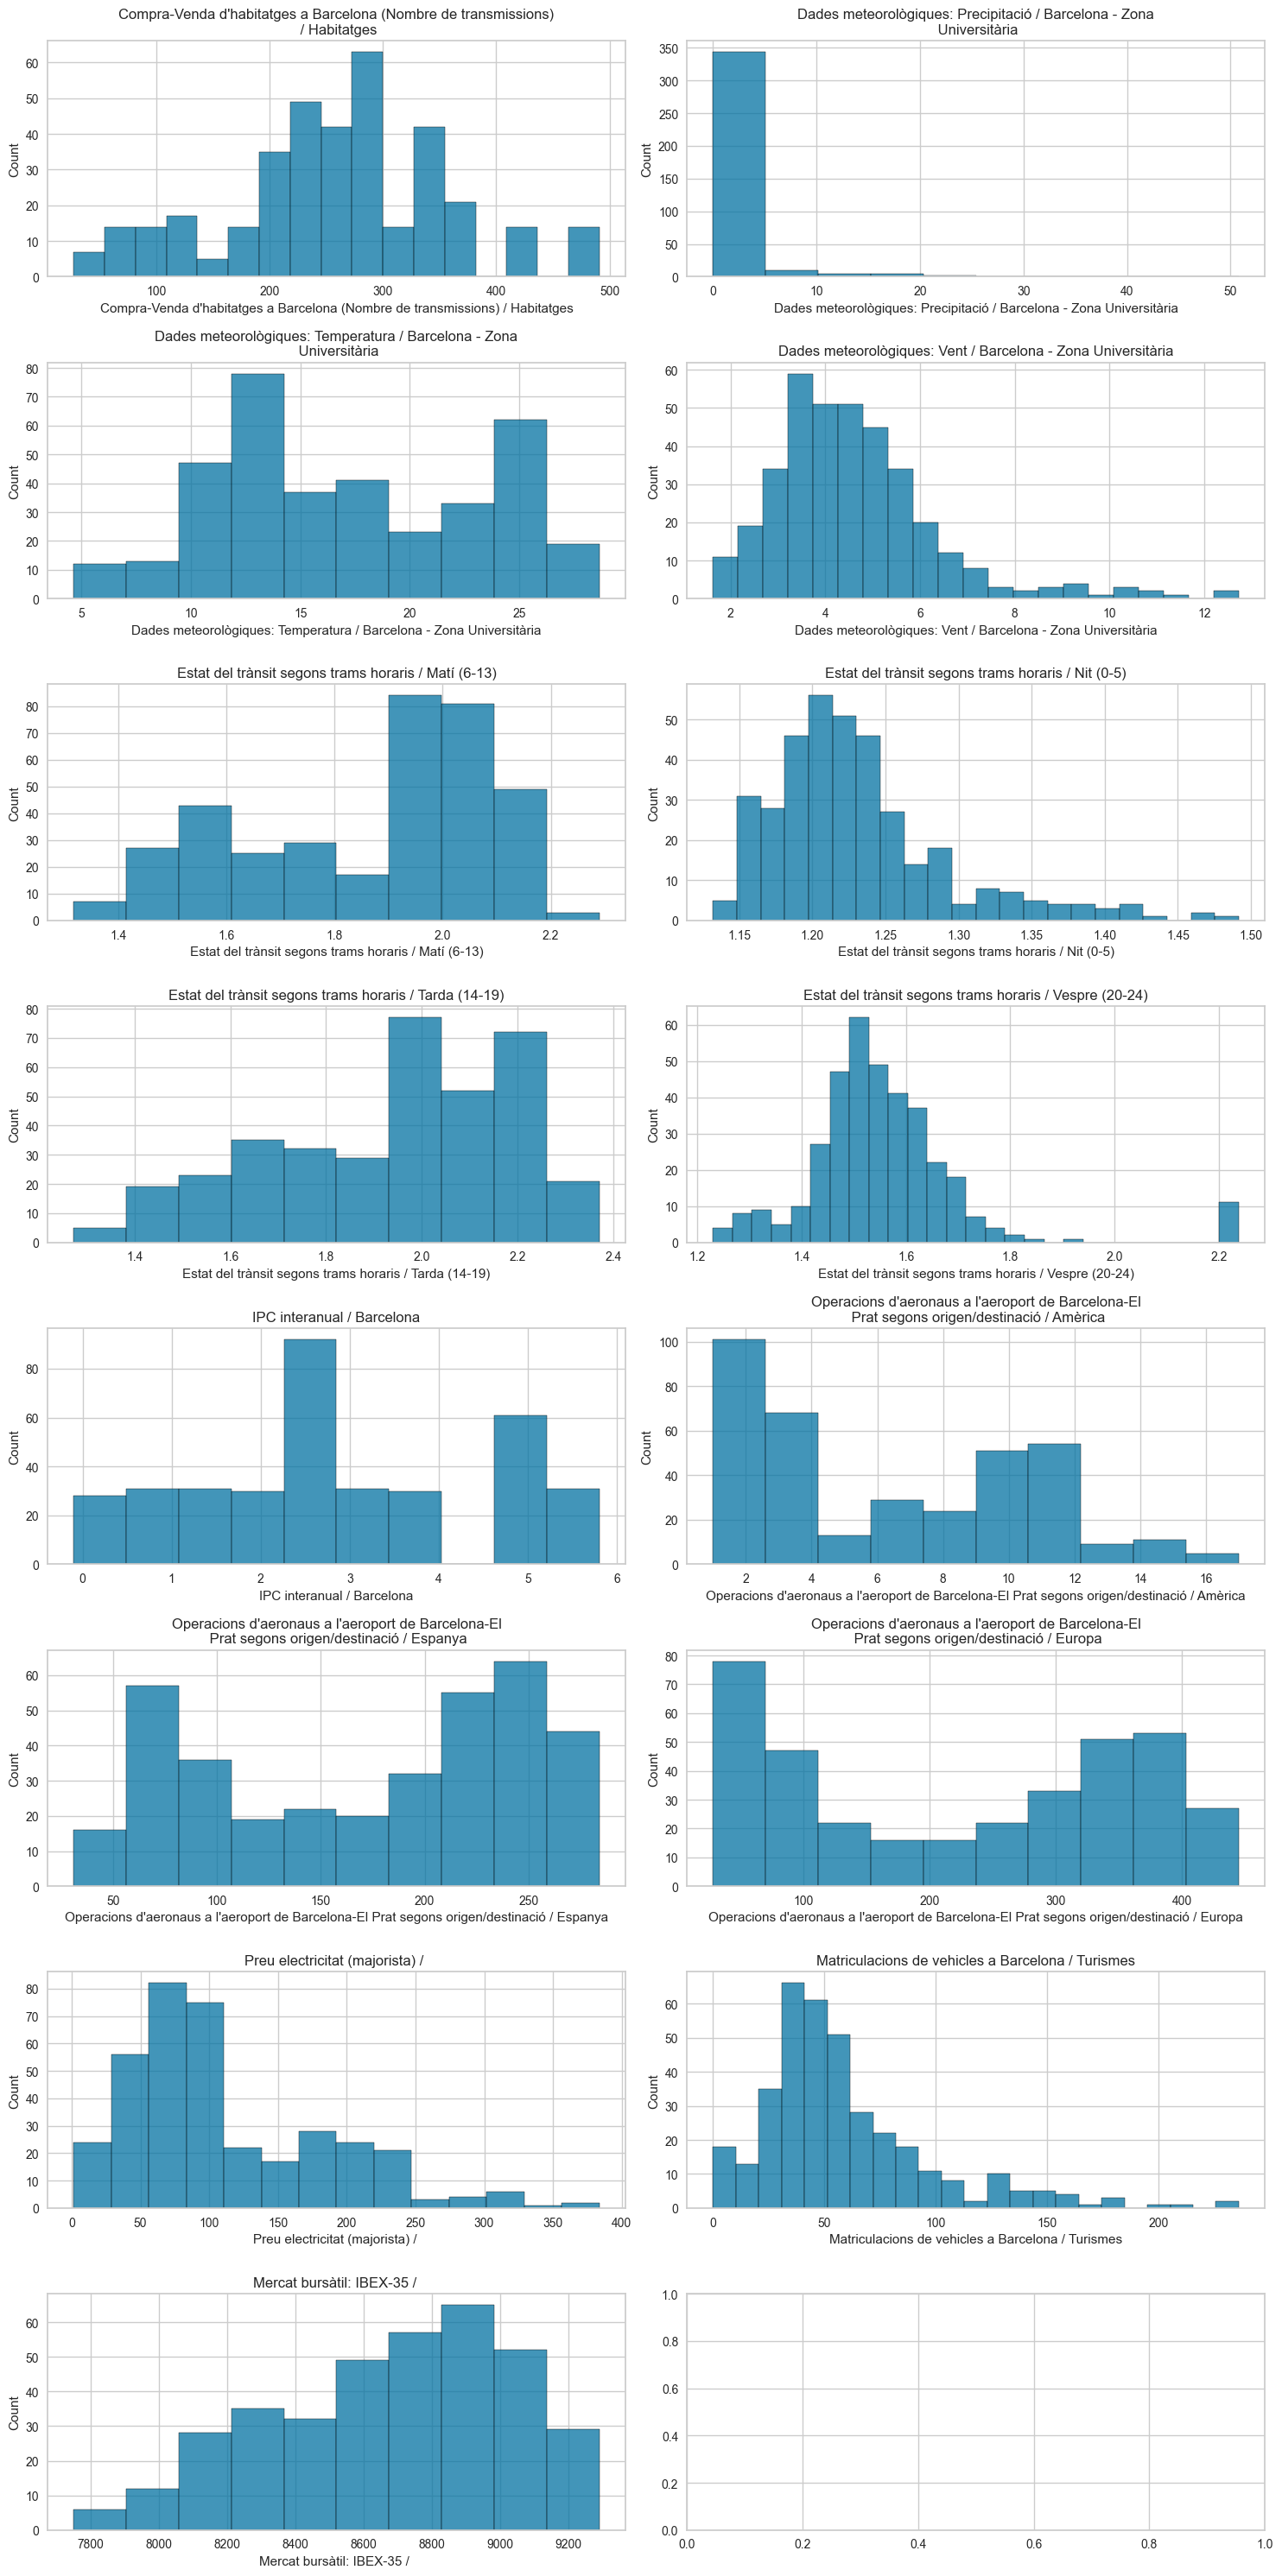

In [13]:
plot_data_frame_histogram(df)

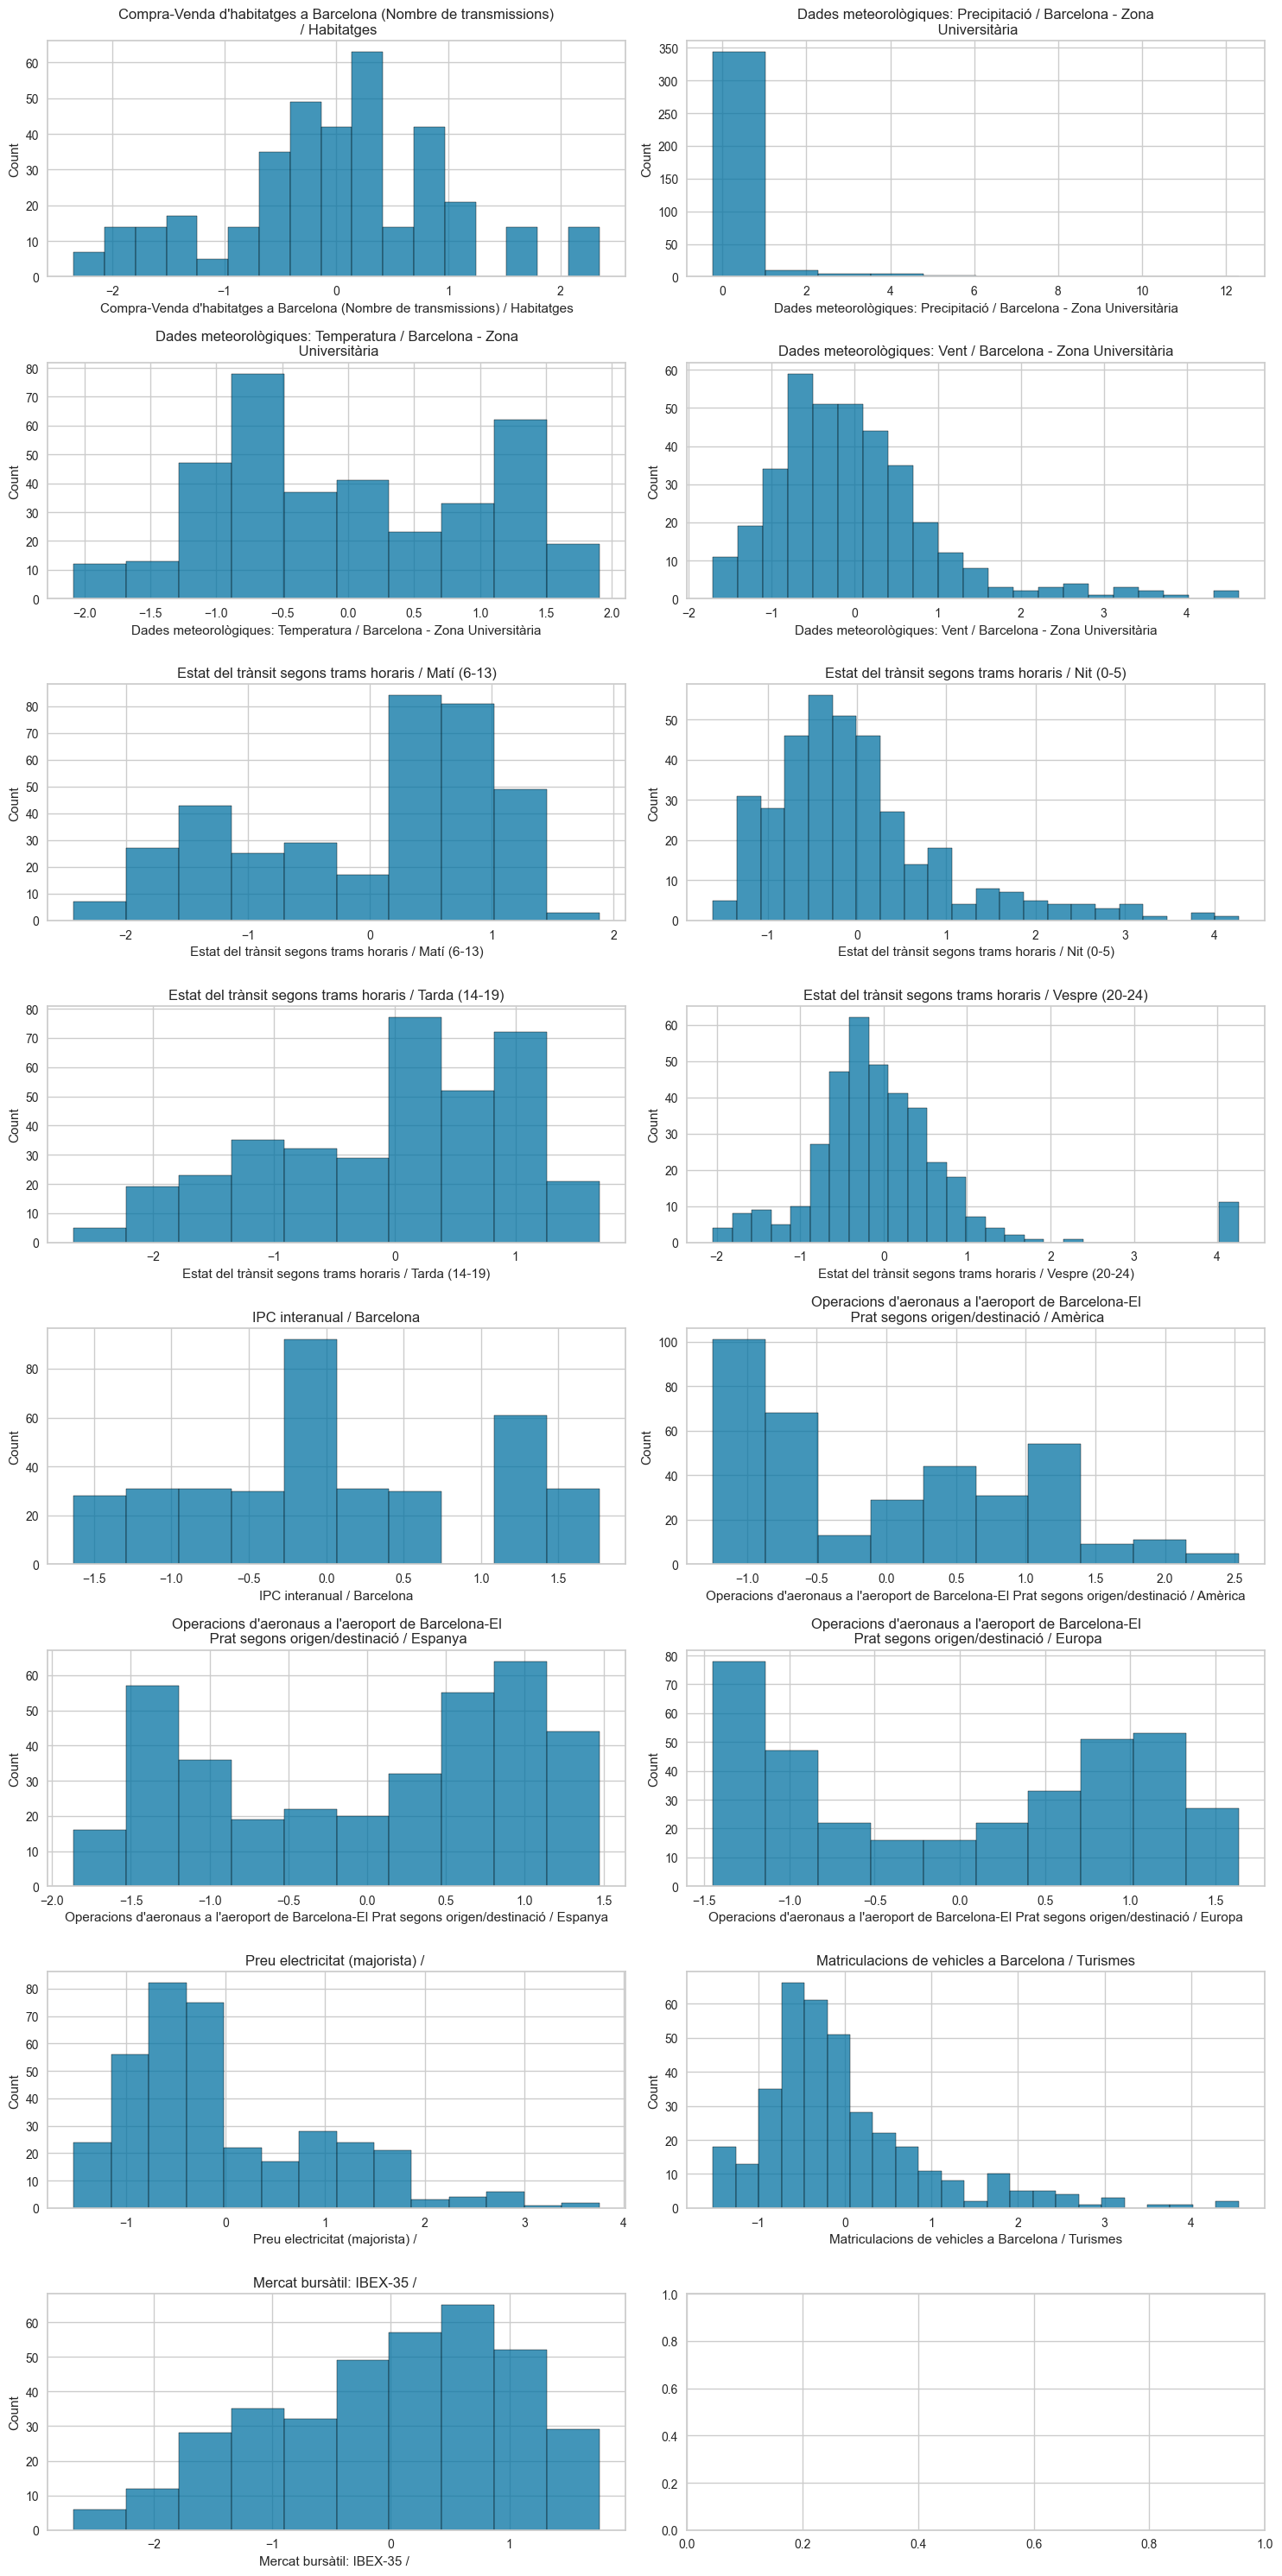

In [14]:
plot_data_frame_histogram(df_standarized)

<AxesSubplot:>

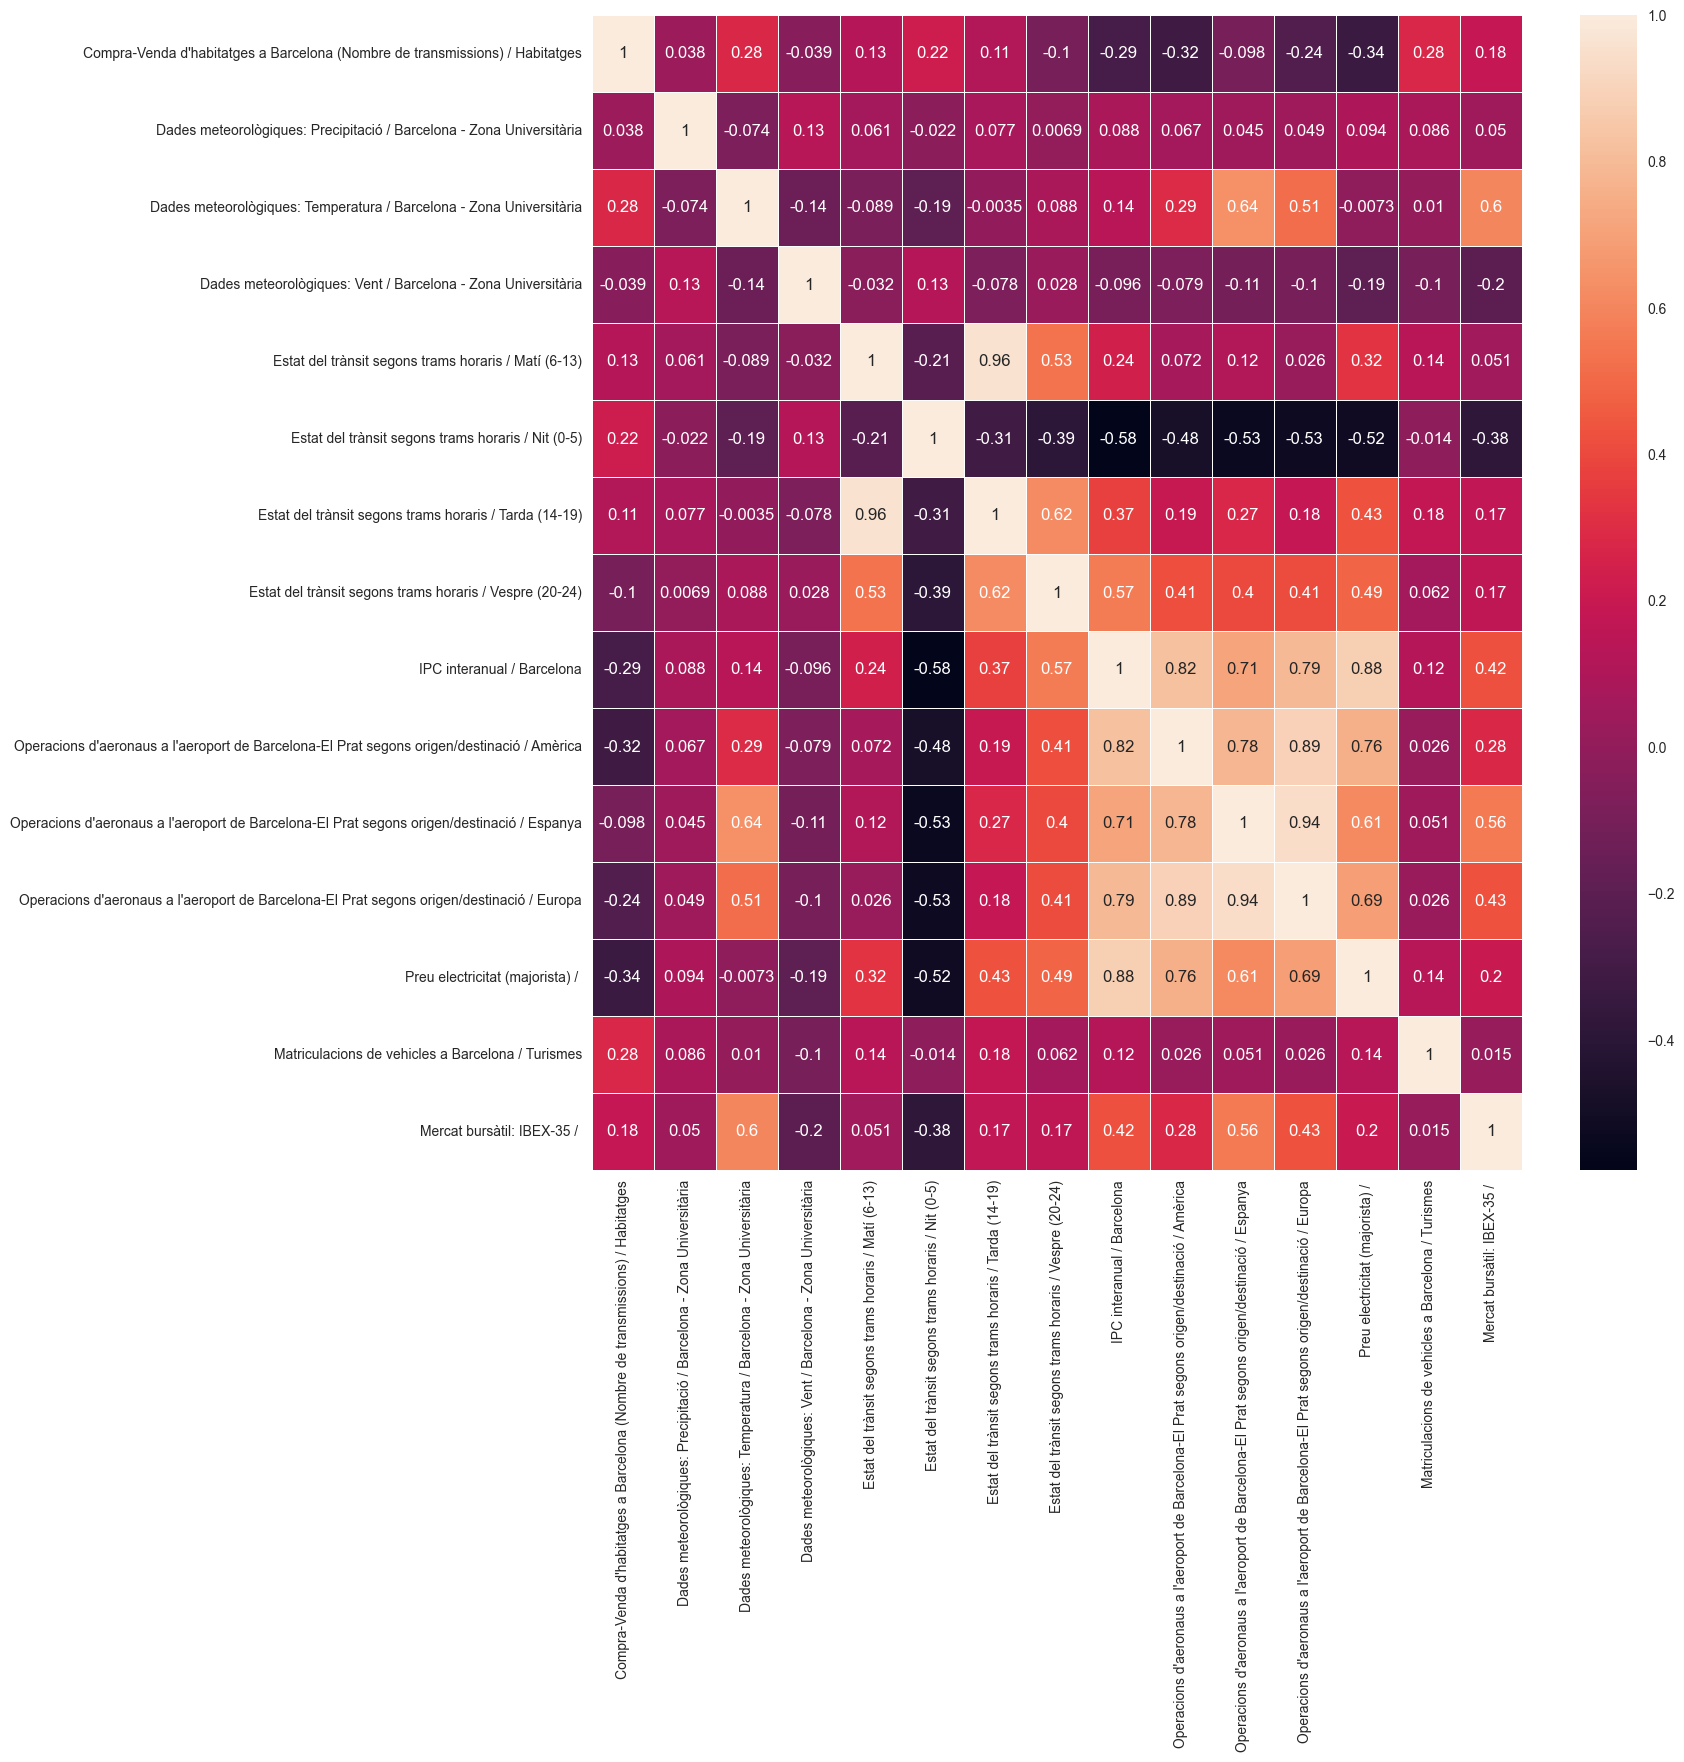

In [15]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

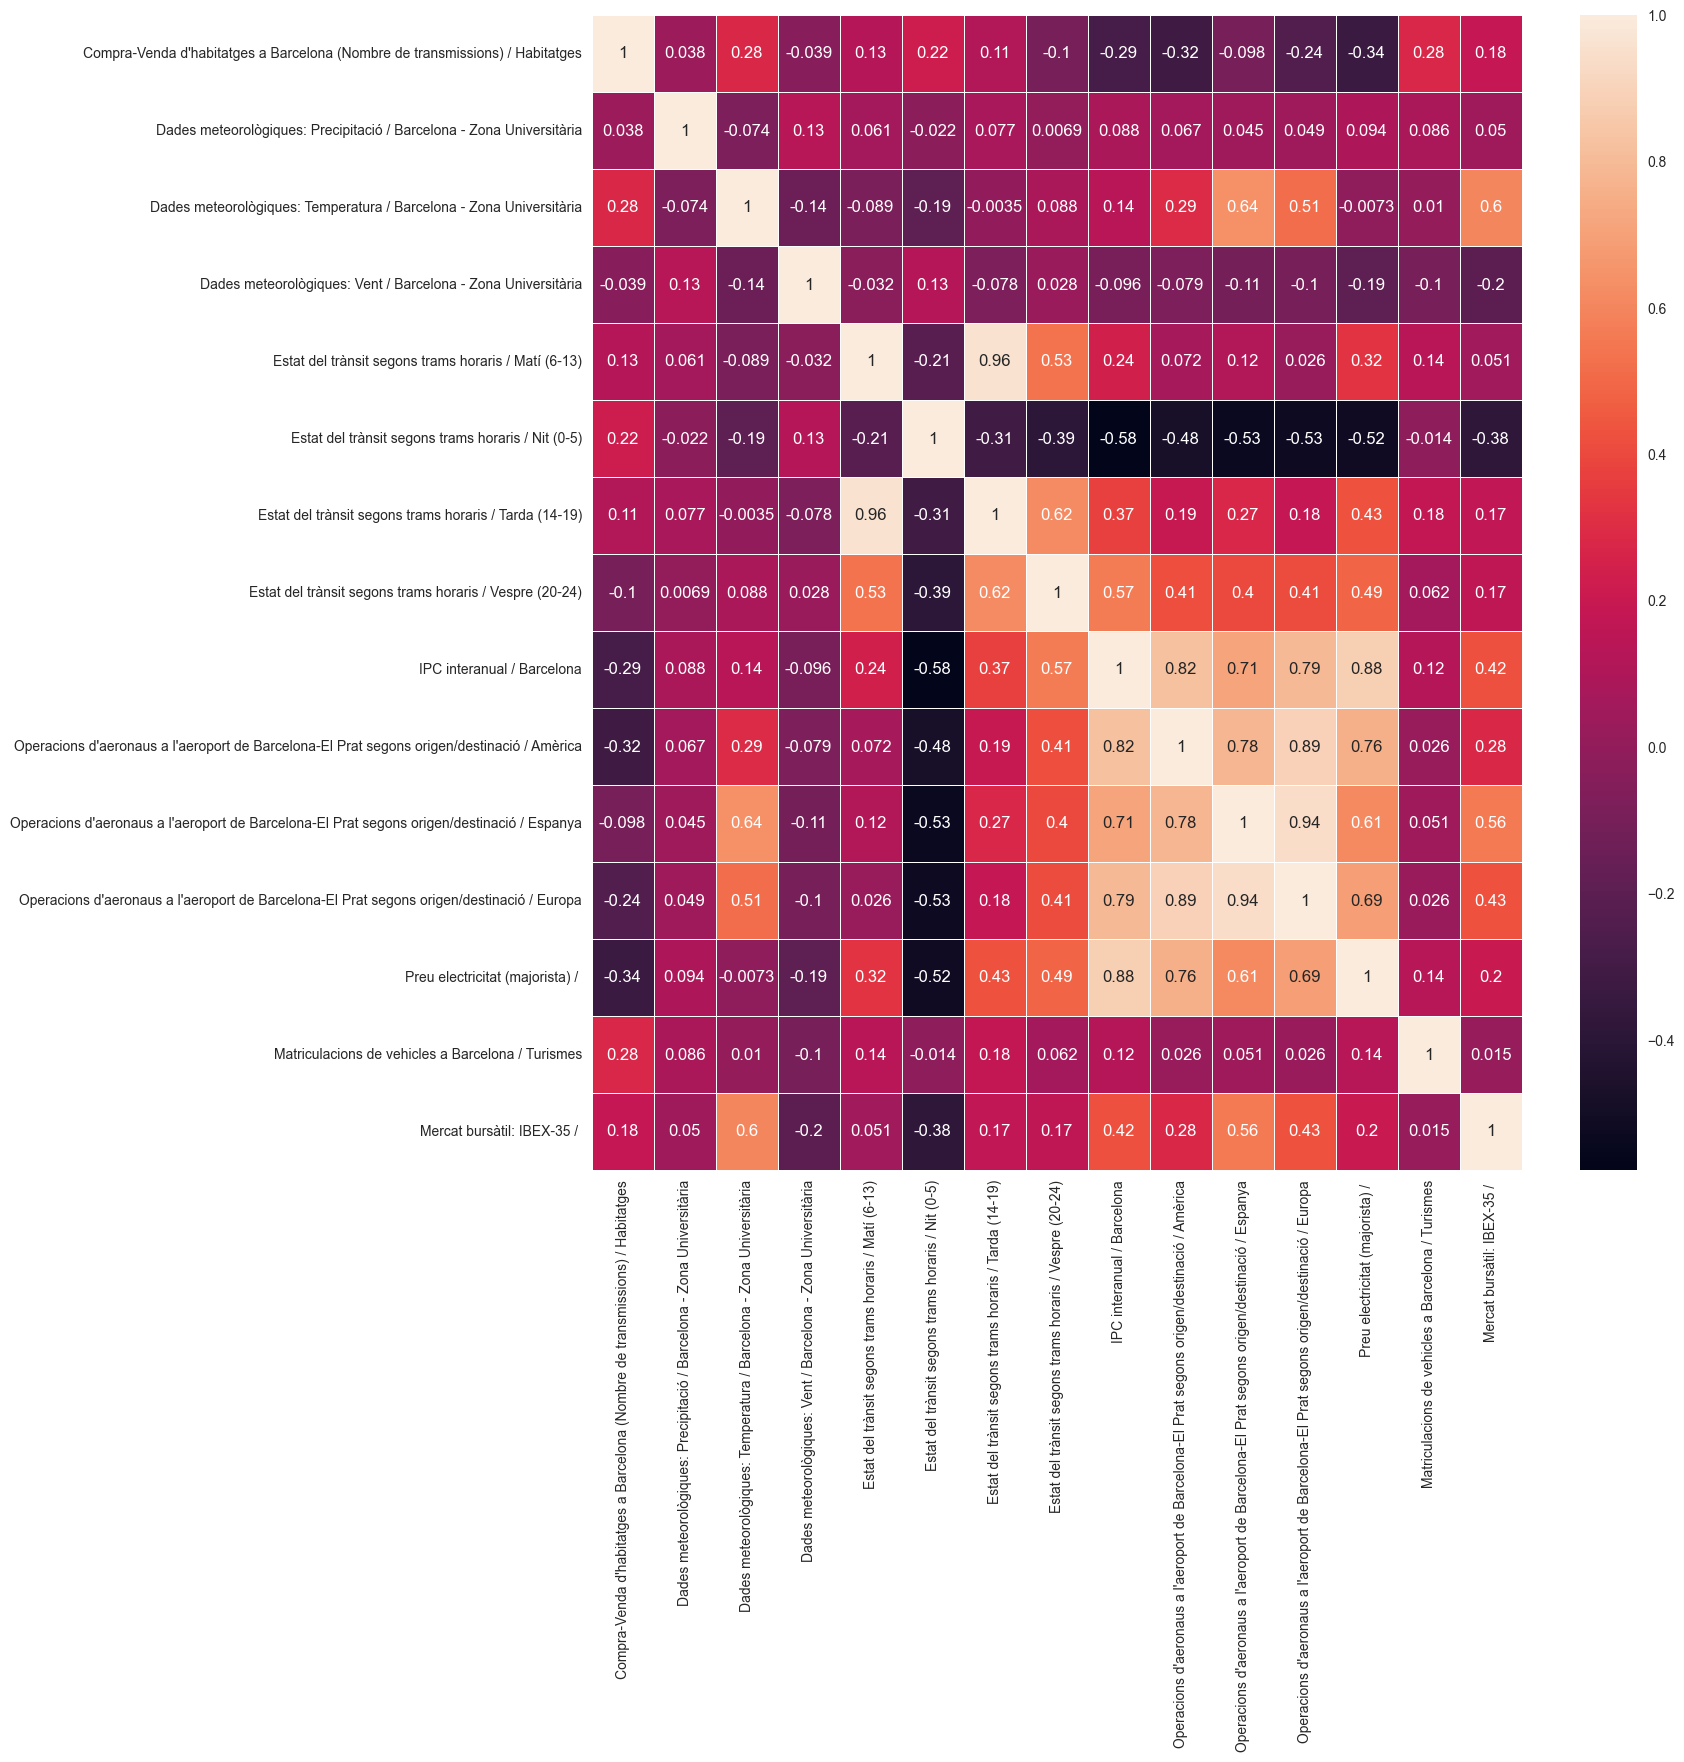

In [16]:
correlation_matrix_standarized = df_standarized.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)

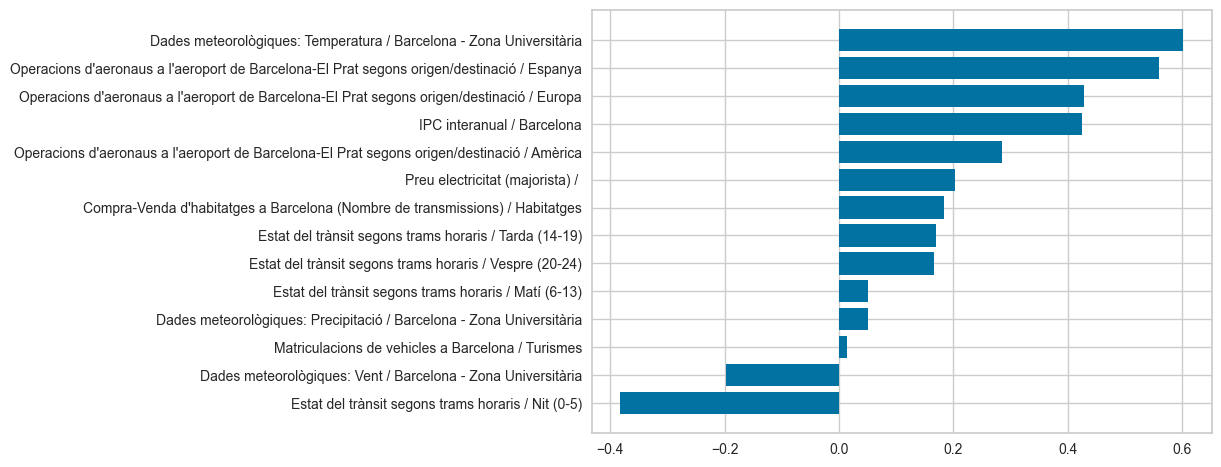

In [17]:
generate_correlation_y(correlation_matrix)

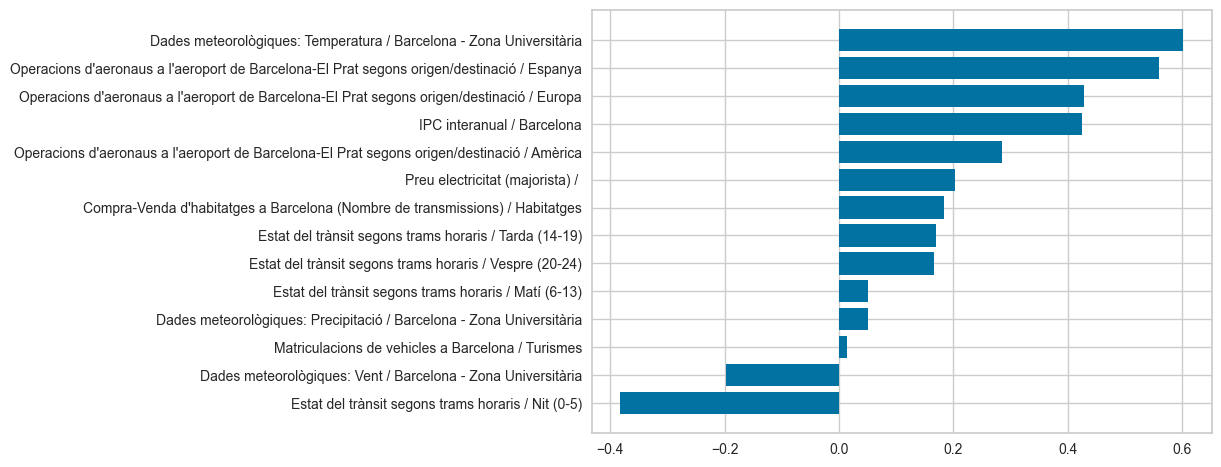

In [18]:
generate_correlation_y(correlation_matrix_standarized)

In [21]:
x_train, y_train, x_test, y_test = train_test_split_x_y(df)
train_standarized, test_standarized = train_test_split_x_y(df_standarized, divide_xy=False)

# Apartat b. Analisis de Componentes Principales

In [22]:
myPCA = PCA().fit(train_standarized);

print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[0.41844749 0.15401348 0.11492041 0.07635827 0.06272377 0.04614923
 0.03694917 0.02969302 0.02285016 0.01741271 0.00901989 0.00667398
 0.00236491 0.00154707 0.00087644]
[0.41844749 0.57246097 0.68738138 0.76373966 0.82646342 0.87261265
 0.90956182 0.93925484 0.962105   0.97951771 0.9885376  0.99521158
 0.99757649 0.99912356 1.        ]


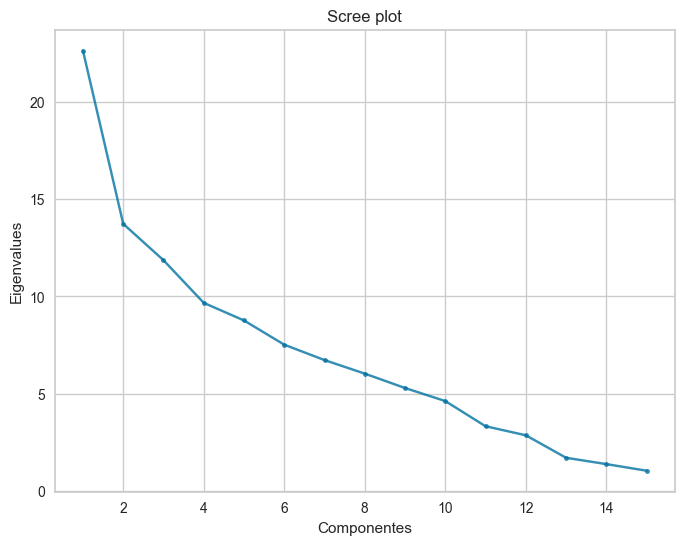

In [23]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Eigenvalues');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

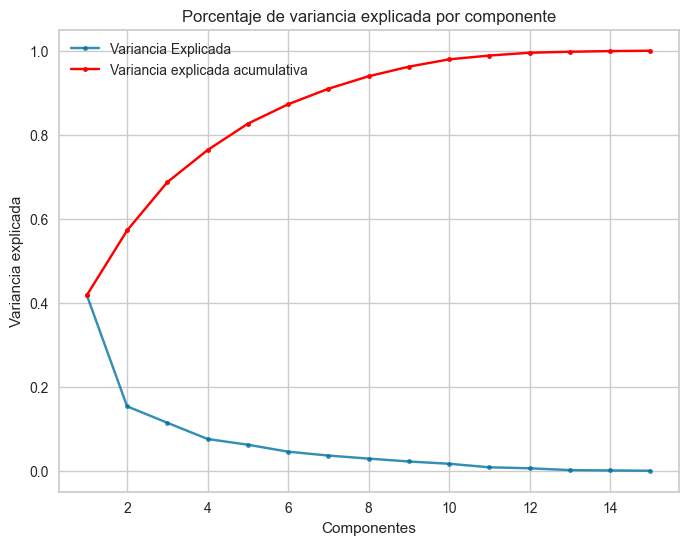

In [24]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

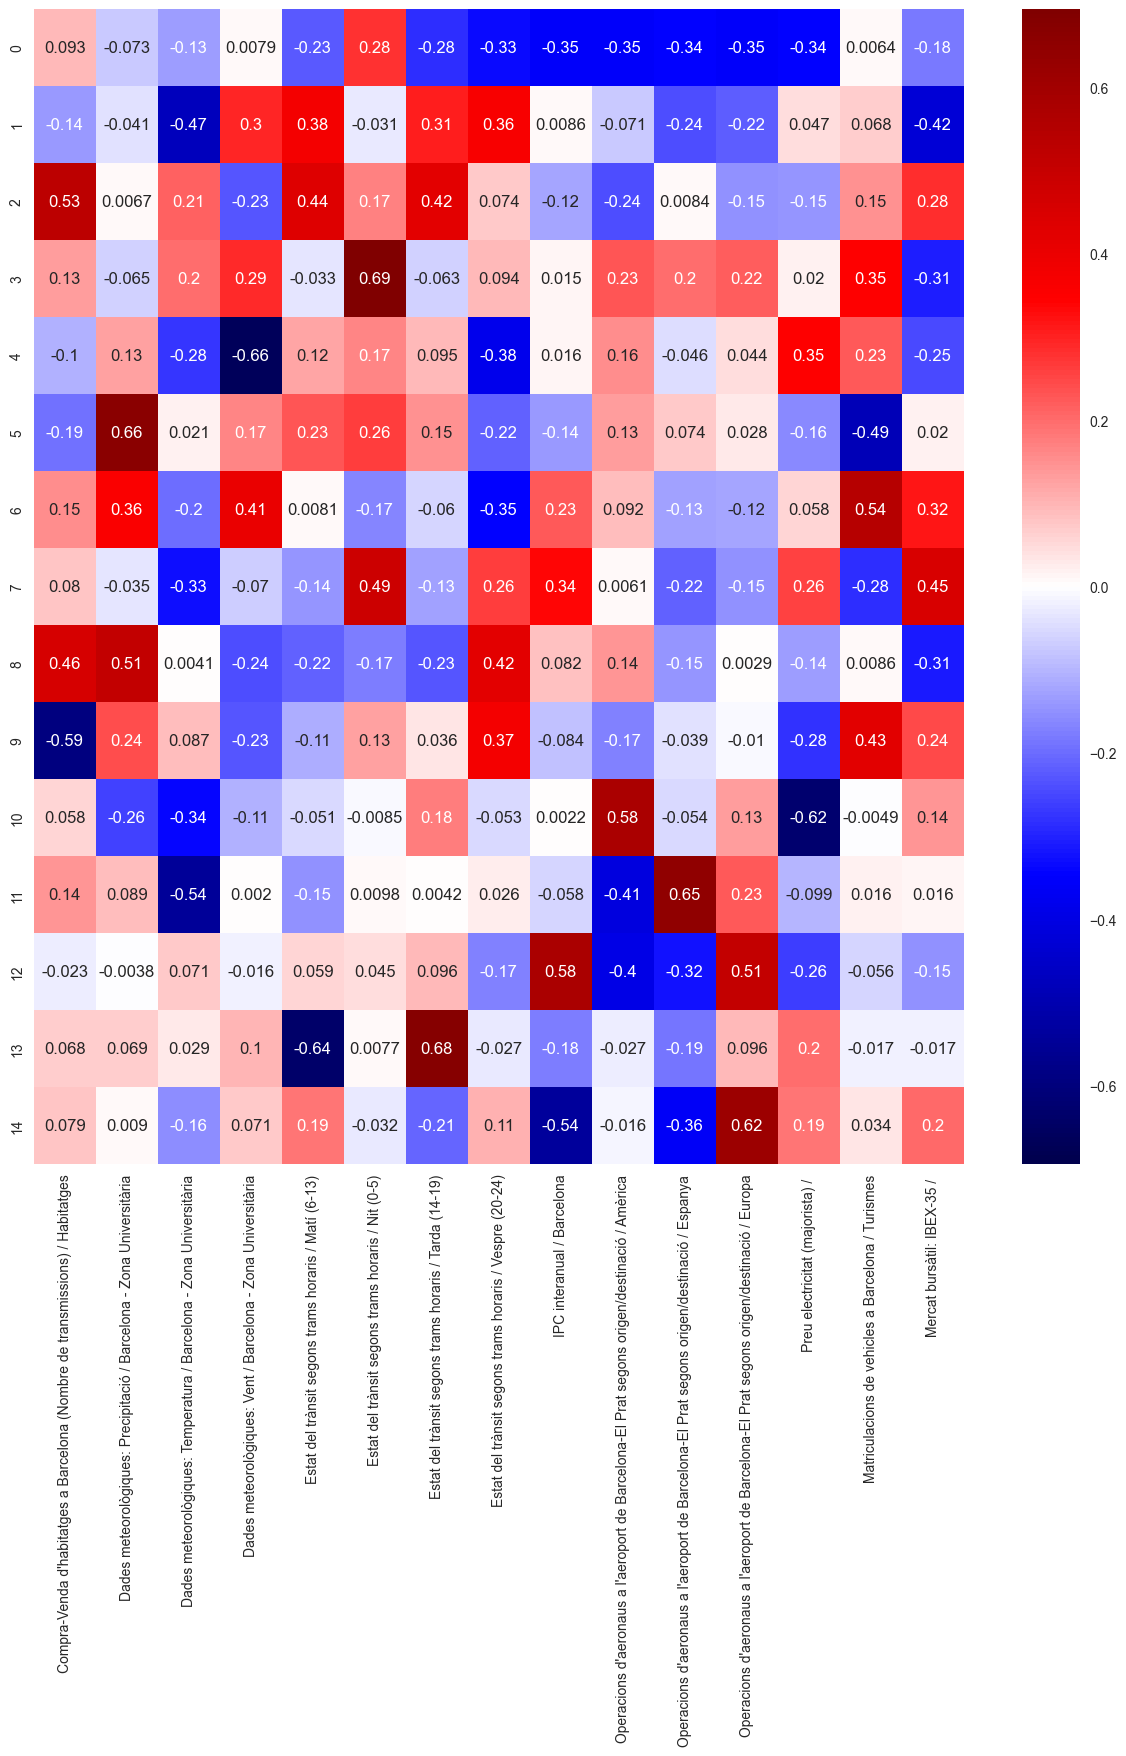

In [25]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(myPCA.components_, cmap='seismic', 
            xticklabels=list(df_standarized.columns),
            vmin=-np.max(np.abs(myPCA.components_)),
            vmax=np.max(np.abs(myPCA.components_)),
            annot=True);

# Apartado c. Ajusta una regresion lineal

In [26]:
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]
ridge_cv =RidgeCV(alphas=lambdas,cv=5).fit(x_train, y_train)

print(f'Best lambda: {ridge_cv.alpha_} R2 score: {ridge_cv.best_score_:3.3f}')

Best lambda: 0.0001 R2 score: 0.447


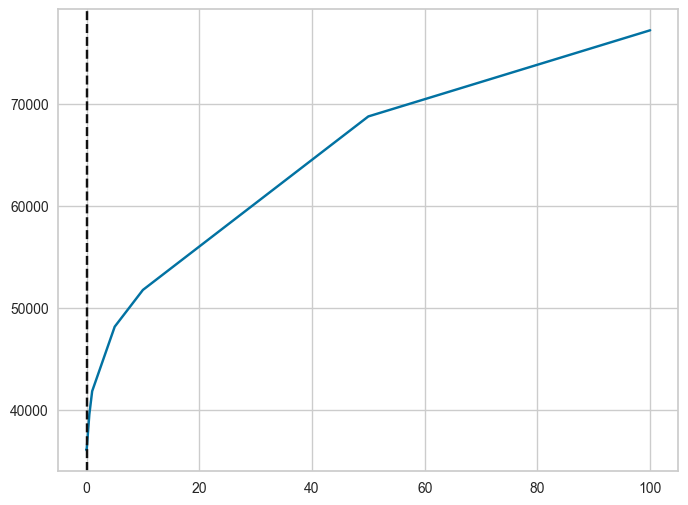

In [29]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(RidgeCV(alphas=lambdas));
vis.fit(x_train, y_train);

In [32]:
lasso_cv =LassoCV(alphas=lambdas,cv=5).fit(x_train,y_train)

lasso_r2 =  np.mean(cross_val_score(lasso_cv, x_train,y_train))

print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)

Best lambda: 0.0001 R2 score: 0.3625035818503139


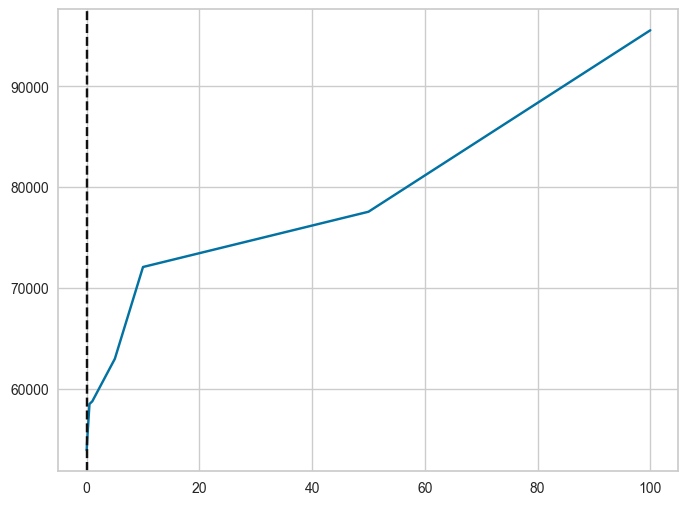

In [34]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(LassoCV(alphas=lambdas));
vis.fit(x_train, y_train);